In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from numpy import NaN
import csv
import matplotlib
from geopy.distance import vincenty


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


# Read UA728 From the data dir and compute the enrgy height

In [2]:
sfo_lat = 37.6188056
sfo_lon = -122.3754167
sfo_location = np.array((sfo_lat,sfo_lon,0))

flight_dist = []
flight_eheight = []
ua_lat = []
ua_lon = []
ua_alt = []

fileRead = "data/UA728_8ff29f6_03042016.csv"

with open(fileRead, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    csvreader.next()
    for row in csvreader:
        lat,lon = row[3].split(",")
        point_location = np.array((float(lat),float(lon),float(row[4])))
        distanceSFO_nmi = (vincenty(point_location, sfo_location).miles*0.868976)
        if distanceSFO_nmi <= 30.0:
            eheight_ft = float(row[4]) + ((float(row[5]) * float(row[5]) * 0.5144 * 0.5144)/(2 * 9.81))*3.28 
            flight_dist.append(distanceSFO_nmi)
            flight_eheight.append(eheight_ft)
            ua_lat.append(float(lat))
            ua_lon.append(float(lon))
            ua_alt.append(float(row[4]))
# plt.plot(flight_dist,flight_eheight,'b*-')

# Plot all SFO Arrivals and compare UA728 wrt EHeight

num of lines in file 3582
num_flights 192
0.0541581673383 -12.6483500295 742.902447221 1532.00617342


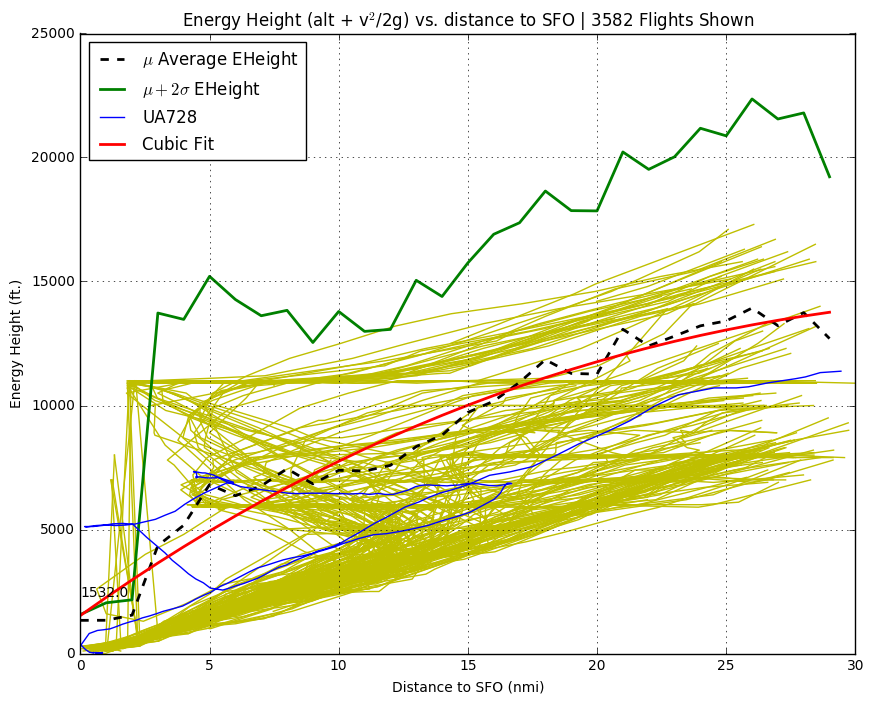

In [3]:
x = []
y = []
dist2sfo = []
eheight = []
all_lat = []
all_lon = []
all_alt_ft = []


# fileRead = "data/SFO_Arrivals_Complete.csv"
fileRead = "data/SFO_Arrivals.csv"
data = np.genfromtxt(fileRead, delimiter=',',skip_header=1)
# print all(isinstance(x, float) for x in data)

num_flights, _ = data.shape
print "num of lines in file", num_flights
unique_flightIds = np.unique(data[:,0])
print "num_flights", unique_flightIds.size
oldFlightId=0
for i in range(num_flights):
    flightId = data[i,0]
    if flightId==oldFlightId:
        x.append(data[i,1]) #dist 
        all_lat.append(data[i,3])
        dist2sfo.append((data[i,1]))
        eheight.append((data[i,2]))
        y.append(data[i,5]) #eheight
        all_lon.append(data[i,4])
        all_alt_ft.append(data[i,5])
        
#         if (float(data[i,1]) < 2 and float(data[i,2]) > 10000):
#             print " wierd flight = ", flightId, ',', float(data[i,1]), ', ',float(data[i,2])
                 
    else:
        plt.plot(x,y,'y-')
        oldFlightId = flightId
        x=[]
        y=[]
plt.title(r'Energy Height (alt + v$^2$/2g) vs. distance to SFO | %s Flights Shown'%(num_flights))
plt.grid()

#plt.show()

## print all(isinstance(int(round(x)), int) for x in dist2sfo)
## Compute average and std. deviation at each NM from SFO
dist2sfoRound = [int(round(x)) for x in dist2sfo]
avgHeightArray = np.zeros([len(dist2sfo),31])

for i,val in enumerate(dist2sfoRound):
    # Val is distant from SFO
    nonemptyrow = next((ii for ii, j in enumerate(avgHeightArray[:,val]) if j==0), -1)
    # Comment: Remove spurious data -> High EHeight at low dist from SFO
    if ((val < 3 and eheight[i] < 5000) or (val>=3)):
        avgHeightArray[nonemptyrow,val] = eheight[i]
    
avgHeightArray[avgHeightArray==0] = np.nan
# print "Small height found",[x for x in avgHeightArray[:,0] if x < 1]

avgHeight = []
stddev = []
stddevx2 = []
stddevxminus2 = []
# print avgHeightArray[0:10,0]

for i in range(30):
#     print "Average height at ", i +1 , " NM = ", np.nanmean(avgHeightArray[:,i]), "stddev=", np.nanstd(avgHeightArray[:,i],ddof=1)
    avgHeight.append(np.nanmean(avgHeightArray[:,i]))
    stddev.append(np.nanstd(avgHeightArray[:,i],ddof=1))

stddev = [x + 2*y for x, y in zip(avgHeight, stddev)]

plt.figure(1)
p1 =plt.plot(np.arange(30),avgHeight,'k--',linewidth=2,label=r'$\mu$ Average EHeight')
p2 =plt.plot(np.arange(30),stddev,'g-',linewidth=2,label=r'$\mu + 2\sigma$ EHeight')


## Plot UA flight
p3 = plt.plot(flight_dist,flight_eheight,'b-',label='UA728')

a,b,c,d = np.polyfit(np.arange(30), avgHeight, 3)
print a,b,c,d
x = np.arange(30)
p4 = plt.plot(x, a*x*x*x + b*x*x + c*x + d, 'r-',linewidth=2,label='Cubic Fit')

p = p1+p2+p3+p4
lables = [l.get_label() for l in p]
plt.xlabel('Distance to SFO (nmi)')
plt.ylabel('Energy Height (ft.)')
plt.legend(p,lables,loc=2)
plt.annotate(round(d),xy=(0,d*1.5))
plt.show()


## Plot the runway configuratino at SFO

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://code7700.com/images/ksfo.png",width=550, height=550)


## Plot the flight trajectories to show the runway configuration in use

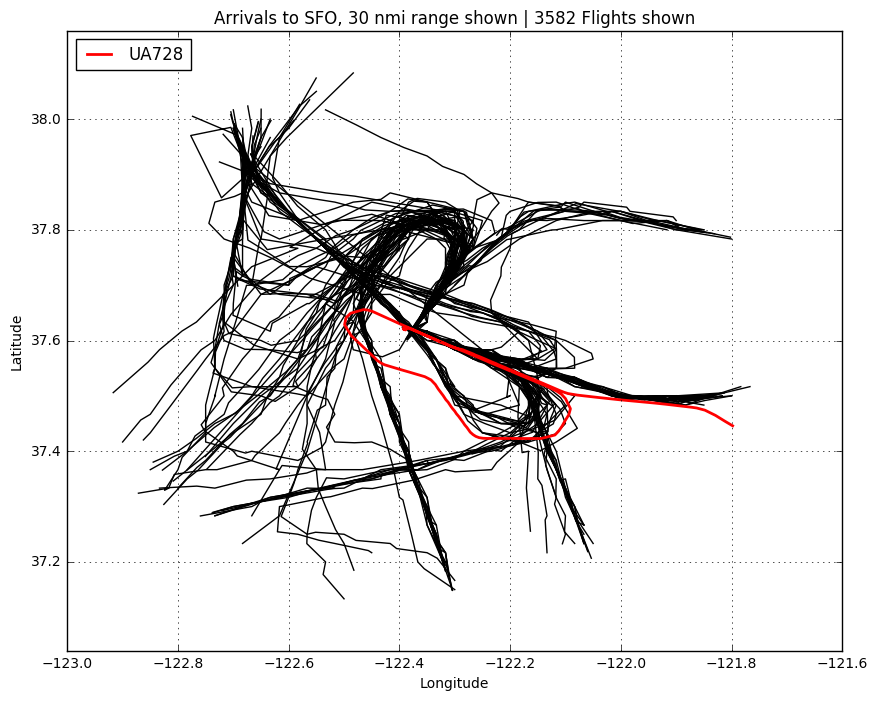

In [5]:
lat = []
lon = []
alt_ft = []
data_pos = np.genfromtxt(fileRead, delimiter=',',skip_header=1)
# print all(isinstance(x, float) for x in data)

plt.figure(2)
plt.axis('equal')
plt.grid()

num_flights, _ = data_pos.shape
unique_flightIds = np.unique(data[:,0])
oldFlightId=0
for i in range(num_flights):
    flightId = data[i,0]
    if flightId==oldFlightId:
        lat.append(data[i,3])
        lon.append(data[i,4]*-1)
        alt_ft.append(data[i,5])        
#         if (float(data[i,1]) < 2 and float(data[i,2]) > 10000):
#             print " wierd flight = ", flightId, ',', float(data[i,1]), ', ',float(data[i,2])
                 
    else:
        plt.plot(lon,lat,'k-')
        oldFlightId = flightId
        lat=[]
        lon=[]
plt.title(r'Arrivals to SFO, 30 nmi range shown | %s Flights shown'%num_flights)

## Plot UA flight
p2 = plt.plot(ua_lon,ua_lat,'r-',linewidth=2,label='UA728')

lables = [l.get_label() for l in p2]
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(p2,lables,loc=2)
plt.show()

## Plot the same chart but show Energy Height and Altitude
To see if the runway configuration has any impact on Energy height. If so there has to be multiple safety cut-offs for same airport.

In [6]:
cm = plt.cm.get_cmap('coolwarm')
all_lon = [x*-1 for x in all_lon]
all_lat = all_lat + ua_lat
all_lon = all_lon + ua_lon
eheight = eheight + flight_eheight
all_alt_ft = all_alt_ft + ua_alt

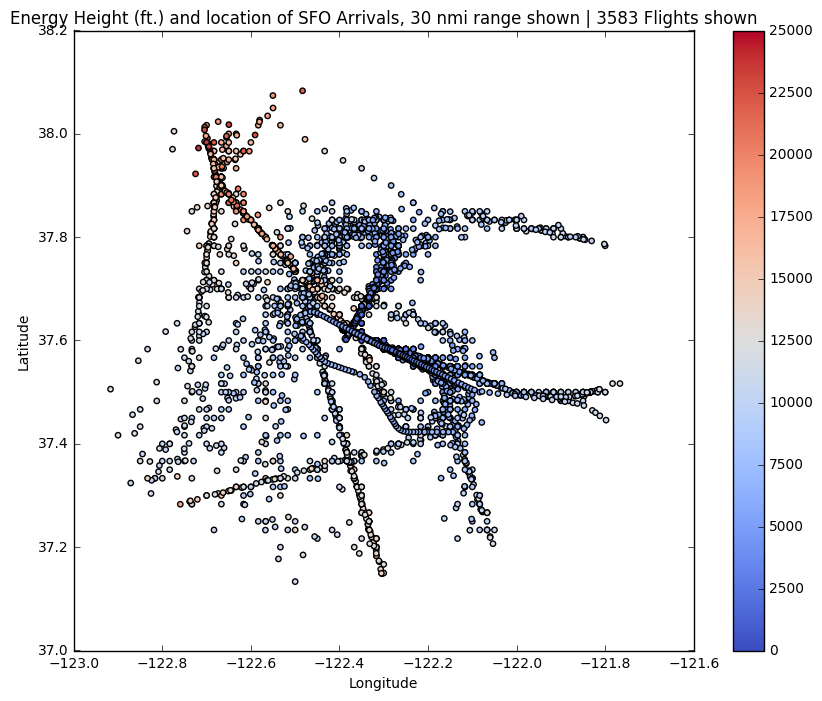

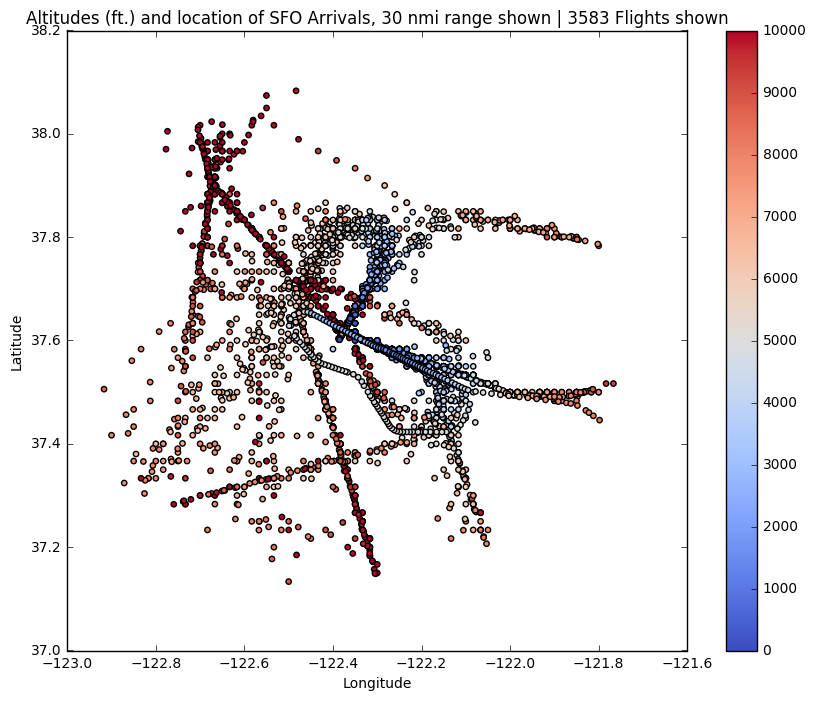

In [8]:

# print all_lat
# print all_lat.size, all_lon.size,eheight.size

plt.figure(2)
# plt.subplot(2,2,1)
sc = plt.scatter(all_lon, all_lat, c=np.around(eheight,decimals=1), vmin=0, vmax=25000, s=15, cmap=cm)
plt.colorbar(sc)
plt.title(r'Energy Height (ft.) and location of SFO Arrivals, 30 nmi range shown | %s Flights shown'%(num_flights +1) )
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.figure(3)
# plt.subpolt(1,2,2)
sc = plt.scatter(all_lon, all_lat, c=np.around(all_alt_ft,decimals=1), vmin=0, vmax=10000, s=15, cmap=cm)
plt.colorbar(sc)
plt.title(r'Altitudes (ft.) and location of SFO Arrivals, 30 nmi range shown | %s Flights shown'%(num_flights + 1))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
# plt.show()
